<a href="https://colab.research.google.com/github/lynxoo/dmi_ue_wro/blob/master/Zadanie_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*  Odpowiedz na pytania:
  *   które składniki są najbardziej powiązane z jakością wina?
  *   czy istnieją jakieś zależności między składnikami?

* Zaproponuj listę cech, które powinny wziąć udział w klasyfikacji win 



##Wczytaj zbiór Wine Quality 
link: https://raw.githubusercontent.com/aniku10/dataMining/master/winequality-red.csv - (; separated)

In [0]:
import pandas as pd
dataset_link = 'https://raw.githubusercontent.com/aniku10/dataMining/master/winequality-red.csv'
wine_quality = pd.read_csv(dataset_link, sep=';')

##Zapoznaj się ze zbiorem, jakie cechy opisują wino.
Wyświetlenie danych

In [66]:
wine_quality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [67]:
wine_quality.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Wyświetlenie wymiarów zbioru danych

In [68]:
wine_quality.shape

(1599, 12)

Wyświetlenie informacji podsumowywujących zbiór danych

In [69]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Wyświetlenie informacji o danych zawartych w zbiorze

In [70]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [71]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Kolumny zawarte w zbiorze danych:
* **fixed acidity** - stała kwasowość - wartość opisujaca zawartość rozpuszczonych kwasów w winie, których nie da się od niego oddzielić poprzez odparowywanie. Kwasy budujące strukturę, kwasowość wina.
* **volatile acidity** - lotna kwasowość - wartość opisująca zawartość kwasów ogarnicznych, które można odparować. Głównie dotyczy ona kwasu octowego, którego im wyższa wartość tym lepiej wyczuwalne są nieporządane aromaty w winie.
* **citric acidity** - kwas cytrynowy - sztucznie dodawany do zakwaszenia wina, może zostać przekształcony w kwas octowy (nieporządane aromaty)
* **residual sugar** - cukry resztkowe - Cukry pozostałe w winie po przeprowadzeniu fermentacji.
* **chlorides** - chlorki - budują mineralność wina
* **free sulfur dioxide** - wolny dwutlenek siarki - zapobiega utlenianiu, może spowodować wystąpienie nieporządanych aromatów. 
* **total sulfur dioxide** - całkowita zawartość dwutlenku siarki
* **density** - gęstość - wartość dla gotowego wina zależna jest od zawartości alkoholu i cukrów resztkowych.
* **pH** - wartość pH - kwasowość/zasadowość wina, watości przyjmowane przez tą kolumnę powinny zawierać się w zbiorze <0, 14>
* **sulphates** - siarczyny - zawartość związków siarki, wyższa wartość może skutkować pojawieniem się nieporządanych aromatów.
* **alcohol** - zawartość alkoholu w winie
* **quality** - jakość wina

In [72]:
wine_quality['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Wartości opisujące jakość wina to liczby całkowite od **3** do **8**

##Dokonaj preprocessingu:



###usuń niepotrzebne kolumny - jeśli uważasz, że takie znajdują się w zbiorze
Analizując cechy opisujace wino, można założyć że kolumny **ph** i **density** nie są potrzebne:
* **pH** - powinna być wartością wynikającą z zasad i kwasów zawartych w winie, o wartościach których posiadamy informacje.
* **density** - powinna być wartością zależną głównie od zawartości alkoholu i cukrów resztowych w winie.


In [0]:
wine_quality.drop(['pH'], axis=1, inplace=True)
wine_quality.drop(['density'], axis=1, inplace=True)

Zmiana nazw kolumn

In [0]:
wine_quality.rename(columns={
    'fixed acidity': 'fixed_acidity', 
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_so2',
    'total sulfur dioxide': 'total_so2',
}, inplace=True)

###uzupełnij puste wartości - jeśli takie znajdują się w zbiorze
Na podstawie poniższej tabeli można zauważyć, że w zbiorze nie występują rekordy z brakującymi danymi.

In [75]:
wine_quality.isnull().sum()

fixed_acidity       0
volatile_acidity    0
citric_acid         0
residual_sugar      0
chlorides           0
free_so2            0
total_so2           0
sulphates           0
alcohol             0
quality             0
dtype: int64

##obsłuż wartości odstające - jeśli takie znajdują się w zbiorze

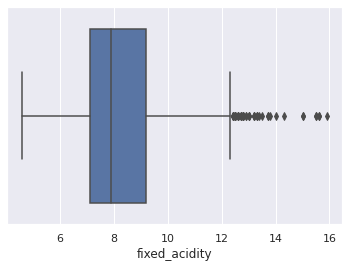

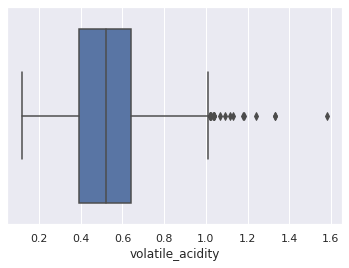

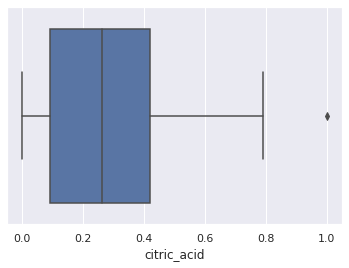

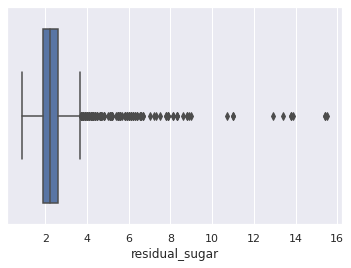

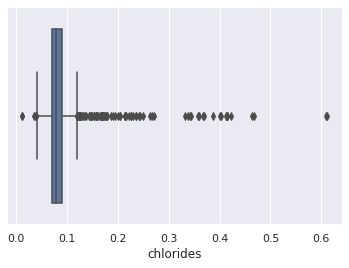

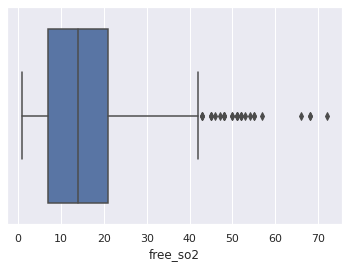

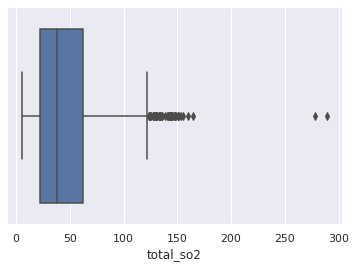

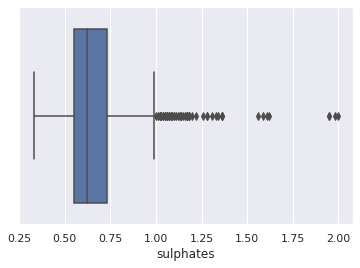

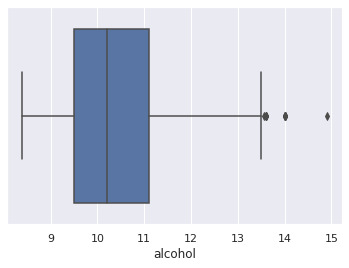

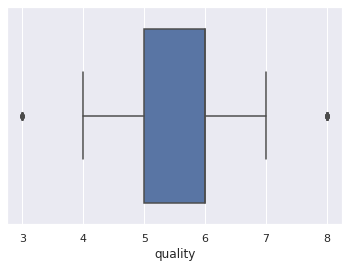

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)


def show_box_diagrams(df):
  for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

show_box_diagrams(wine_quality)

In [77]:
q1 = wine_quality.quantile(0.25)
q3 = wine_quality.quantile(0.75)

iqr = q3 - q1
iqr

fixed_acidity        2.10
volatile_acidity     0.25
citric_acid          0.33
residual_sugar       0.70
chlorides            0.02
free_so2            14.00
total_so2           40.00
sulphates            0.18
alcohol              1.60
quality              1.00
dtype: float64

In [78]:
outliers = (wine_quality < (q1 - 3.0 * iqr)) | (wine_quality > (q3 + 3.0 * iqr))
outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False


In [79]:
no_outliers = ~(outliers).any(axis=1)
no_outliers

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Length: 1599, dtype: bool

In [80]:
no_outliers.value_counts()

True     1437
False     162
dtype: int64

In [0]:
wine_quality._update_inplace(wine_quality[no_outliers])

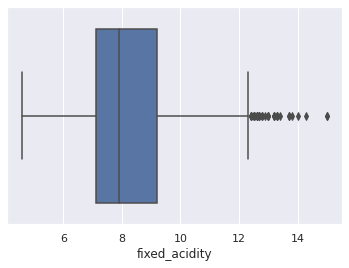

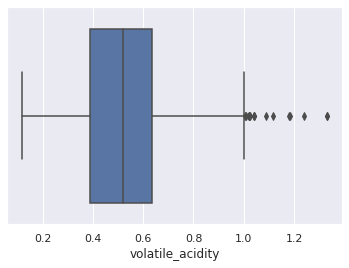

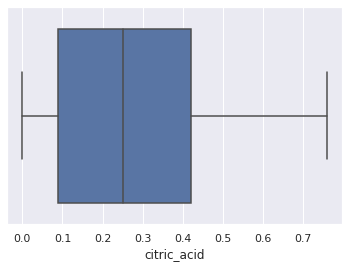

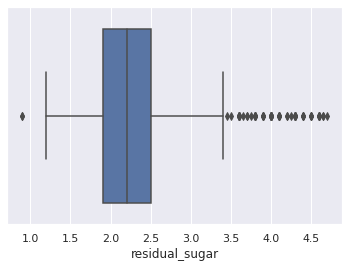

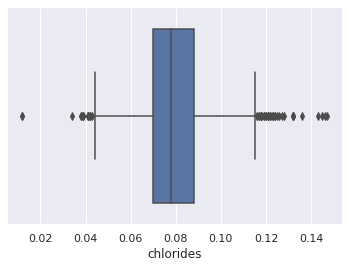

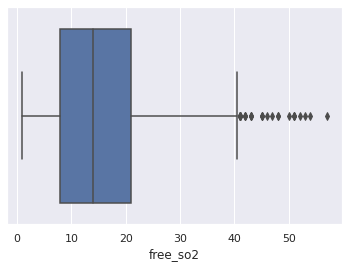

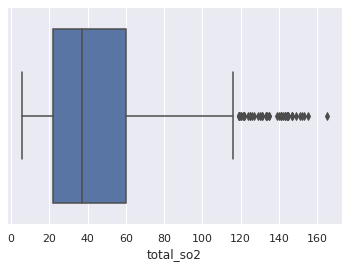

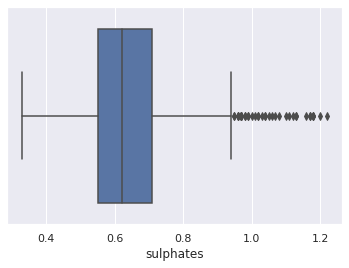

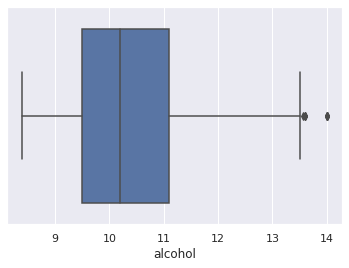

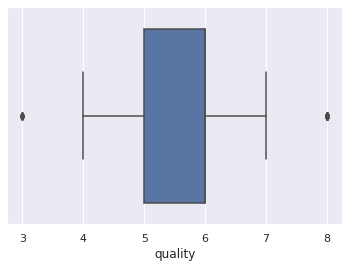

In [82]:
show_box_diagrams(wine_quality)

## Analiza korelacji

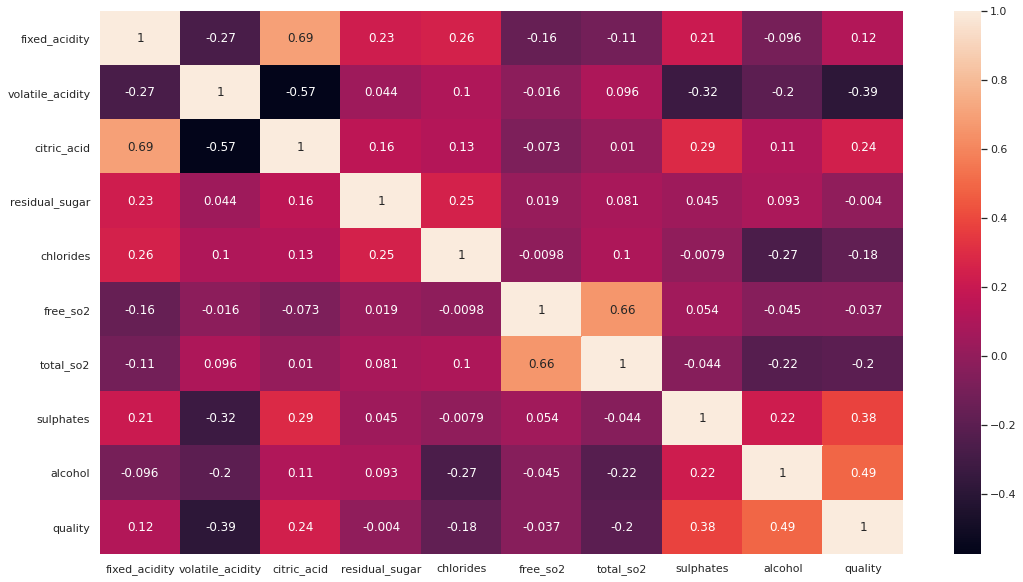

In [83]:

plt.figure(figsize=(18,10))
correlatons = wine_quality.corr()
sns.heatmap(correlatons, annot=True)

###które składniki są najbardziej powiązane z jakością wina?

Analizując powstałą macierz korelacji można zauważyć największe powiązanie pomiędzy jakością a poniższymi cechami:
* alcohol
* sulphates
* volatile_acidity (ujemna)

Można również zauważyć słaby ale nadal dość wysoki poziom zależności pomiędzy jakością a cechami:
* citric_acid
* total_so2 (ujemna)
* chlorides (ujemna)

###czy istnieją jakieś zależności między składnikami?
Silne zależności można zaobserwować pomiędzy cechami:
* citric_acid - fixed_acidity
* citric_acid - volatile_acidity
* free_so2 - total_so2

Ponadto można zaobserować słabe zależności pomiędzy:
* fixed_acidity: sulphates, residual_sugar, chlorides, volatile_acidity, free_so2
* volatile_acidity: alcohol, sulphates
* citric_acid: sulphates, residual_sugar
* chlorides: alcohol, residual_sugar
* total_so2: alcohol

## Selekcja cech

In [84]:
import sklearn.feature_selection as fs

wine_data = wine_quality.drop(columns='quality')
quality_data = wine_quality.loc[:, 'quality']

quality_data

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1437, dtype: int64

In [85]:
fmutual = fs.mutual_info_classif(wine_data, quality_data, n_neighbors=3)
fmutual

array([0.03626963, 0.13224858, 0.04999566, 0.00247034, 0.03274485,
       0.00956342, 0.06205568, 0.12813641, 0.17598018])

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def normalize_column(df, column_name):
    return (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())

normalized = pd.DataFrame()

for col in wine_data.columns:
  normalized[col] = normalize_column(wine_quality, col)

rfe_selector = RFE(estimator = LogisticRegression(),  step=1, verbose=5)
rfe_selector.fit(normalized, quality_data)
rfe_support = rfe_selector.get_support()
rfe_feature = wine_data.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 9 features.
Fitting estimator with 8 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
4 selected features
['volatile_acidity', 'total_so2', 'sulphates', 'alcohol']


Analizujac wyniki zwrócone przez dwa algorytmy, najlepszymi cechami do dalszej analizy są:
* volatile_acidity
* total_so2
* sulphates
* alcohol

Zaproponowane columny cechowały się najwyższymi wsółczynnikami powiązania w macierzy korelacji. 